# Partial Least Square Regression

Partial Least Square Regression is an analytical technique that can be used to predict the values of some unknown dependent variables from a independent variables. To build the model it initially requires a set of independent variables with the known values of the dependent variables <br><br>

Large amount of code copied from : https://towardsdatascience.com/partial-least-squares-f4e6714452a

### Required Packages:

fsspec <br>
s3fs <br>
boto <br>
pandas <br>
math <br>
sklean <br>
matplotlib

## Import Data

All data (training, validation, testing) is imported from a csv of format without the header or column names
<br>

|    | ind1 | ind2 | ind3 | ind4 | ind5 | ... | dep1 | dep2 | dep3 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| spectra 1 | 4.0 | 5.0 | 6.0 | 7.0 | 8.0 | ... | 4.6 | 5.7 | 2.4 | 
| spectra 2 | 5.0 | 5.3 | 6.5 | 7.7 | 8.0 | ... | 4.5 | 5.1 | 2.3 | 
| spectra 3 | 4.3 | 5.6 | 6.5 | 7.0 | 8.1 | ... | 4.4 | 5.2 | 2.4 | 
| spectra 4 | 4.2 | 5.2 | 6.3 | 7.3 | 8.2 | ... | 4.7 | 5.7 | 2.7 | 
| spectra 5 | 4.6 | 4.9 | 6.3 | 7.4 | 8.5 | ... | 4.9 | 5.8 | 2.8 | 
| spectra 6 | 5.7 | 5.7 | 6.7 | 7.3 | 8.6 | ... | 4.6 | 5.8 | 2.9 | 



In [35]:
""" #Uncommment if you have not installed these packages in your python environment
%pip install fsspec
%pip install s3fs
%pip install boto
%pip install scikit-learn
"""

import pandas as pd
import boto

# import the csv file directly from an s3 bucket
file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\PLS test data.csv"
data = pd.read_csv(file, header = None)
#data = data.drop('Unnamed: 0', axis = 1)
data

,0,1,2,3,4,5,6,7,8,9,...,893,894,895,896,897,898,899,900,901,902
0,-1.265404,-6.225640,8.161384,16.891587,33.671387,51.652642,41.897674,34.639112,18.731398,-2.593351,...,37.190256,32.455147,40.182714,41.726882,45.558099,39.873749,45.629003,40,1,59
1,25.252198,20.512614,13.625019,16.960822,41.069331,54.145498,65.481554,60.948961,48.382601,30.124383,...,42.900485,46.368667,53.368459,51.921827,52.289021,62.042774,60.643090,40,1,59
2,26.116376,21.702572,6.014827,-1.866880,-0.668831,-1.314391,23.012906,30.196698,23.091504,18.178156,...,29.479586,32.697746,40.776725,47.532046,56.795533,51.886610,49.965955,40,0,60
3,35.792150,38.680595,13.589586,8.149444,24.128474,21.293182,33.531484,28.120520,11.643281,2.640400,...,57.973272,62.588844,70.238000,76.594024,69.553010,59.709132,61.374364,40,0,60
4,39.227835,32.742351,41.420280,44.658491,43.938415,46.142493,47.656021,47.886492,46.213864,42.469224,...,39.836623,38.790985,46.093671,49.982785,35.561993,42.071821,40.125059,40,1,59
5,42.285932,46.295685,48.906340,48.374560,41.195685,37.763970,32.295542,35.997112,44.048951,37.737965,...,55.269036,50.909932,66.014156,59.082964,48.225280,57.901952,43.990405,40,0,60
6,49.758446,52.995050,38.694654,47.468046,41.860408,49.653222,53.709175,59.284152,65.515316,53.440547,...,28.004790,27.034695,32.339567,22.266881,23.661993,16.855845,1.072831,40,1,59
7,52.076982,37.365504,50.352037,42.590230,42.941404,59.331588,47.402943,55.989171,63.093123,54.759399,...,29.771022,18.006430,32.694580,40.397655,47.048140,46.052352,47.495229,40,1,59
8,54.095425,46.512408,49.622205,57.648526,64.931534,60.453524,53.936085,71.036209,65.499458,58.439306,...,50.064495,64.774504,48.507433,49.329186,45.083080,28.579333,38.074319,40,1,59
9,55.560140,47.054090,47.471220,57.484957,69.627729,67.944090,64.221610,48.121197,42.784306,44.950123,...,45.730382,46.505314,42.334112,41.510139,47.290218,44.475248,33.306255,40,0,60


## Split the data into training, validation, and test data

Depending on the amount of data, split it into training, validation and test data

In [36]:

# Split data in train, val, test, ensue that they add to 100
percentage_train =  60
percentage_validation = 20
percentage_test = 20

num_depen_var = 3

train_cut_off = (int)(len(data) * percentage_train/100)
val_cut_off = (int)(len(data) * (percentage_train+percentage_validation)/100)


train = data.iloc[0:train_cut_off,:]
val = data.iloc[train_cut_off:val_cut_off,:]
test = data.iloc[val_cut_off:len(data),:]

# Split the columns in X and Y
X_colnames = data.columns[:-num_depen_var]
Y_colnames = data.columns[-num_depen_var:]

# Split each train, val and test into two arrays
X_train = train[X_colnames].values
Y_train = train[Y_colnames].values

X_val = val[X_colnames].values
Y_val = val[Y_colnames].values

X_test = test[X_colnames].values
Y_test = test[Y_colnames].values

### Different examples of uring PLSRegression showing the number of components changes the accuracy of the PLSRegression

In [13]:
from sklearn.cross_decomposition import PLSRegression
my_plsr = PLSRegression(n_components=100, scale=True)
my_plsr.fit(X_train, Y_train)

PLSRegression(n_components=100)

C:\Users\edwar\AppData\Local\Temp\ipykernel_25020\2672565672.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


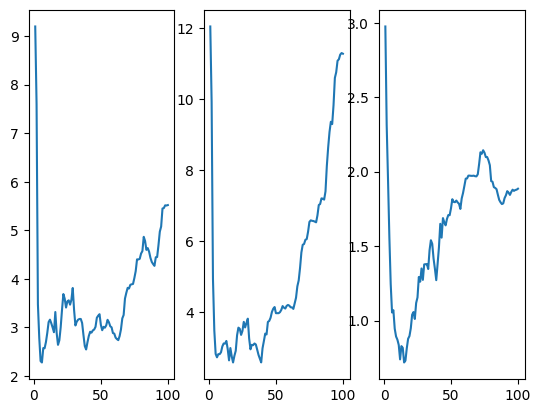

In [14]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Compute the validation error for each n_comp 
water_plot = []
fat_plot = []
protein_plot = []

for n_comp in range(1, 101):
  my_plsr = PLSRegression(n_components=n_comp, scale=True)
  my_plsr.fit(X_train, Y_train)
  preds = my_plsr.predict(X_val)

  water_rmse = sqrt(mean_squared_error(Y_val[:,0] ,preds[:,0]))
  fat_rmse = sqrt(mean_squared_error(Y_val[:,1] ,preds[:,1]))
  protein_rmse = sqrt(mean_squared_error(Y_val[:,2] ,preds[:,2]))
  
  water_plot.append( water_rmse)
  fat_plot.append( fat_rmse)
  protein_plot.append(protein_rmse)

# Create the three plots using matplotlib
fig, axs = plt.subplots(1,3)

axs[0].plot(range(1, 101), water_plot)
axs[1].plot(range(1, 101), fat_plot)
axs[2].plot(range(1, 101), protein_plot)

fig.show()

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCa

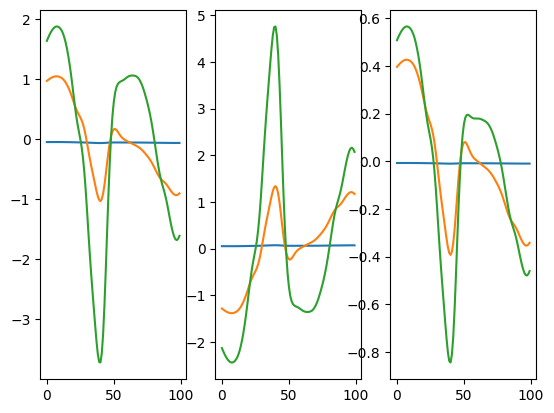

In [15]:
# Coefficients Plot

# fit and extract coefs for 1 comp
my_plsr = PLSRegression(n_components=1, scale=True)
my_plsr.fit(X_train, Y_train)

water_1comp = my_plsr.coef_[:,0]
fat_1comp = my_plsr.coef_[:,1]
protein_1comp = my_plsr.coef_[:,2]


# fit and extract coefs for 2 comps
my_plsr = PLSRegression(n_components=2, scale=True)
my_plsr.fit(X_train, Y_train)

water_2comp = my_plsr.coef_[:,0]
fat_2comp = my_plsr.coef_[:,1]
protein_2comp = my_plsr.coef_[:,2]


# fit and extract coefs for 3 comps
my_plsr = PLSRegression(n_components=3, scale=True)
my_plsr.fit(X_train, Y_train)

water_3comp = my_plsr.coef_[:,0]
fat_3comp = my_plsr.coef_[:,1]
protein_3comp = my_plsr.coef_[:,2]


# Plot in a graph for each y variable
fig, axs = plt.subplots(1, 3)

# water comps
axs[0].plot(water_1comp)
axs[0].plot(water_2comp)
axs[0].plot(water_3comp)

# fat comps
axs[1].plot(fat_1comp)
axs[1].plot(fat_2comp)
axs[1].plot(fat_3comp)

# protein comps
axs[2].plot(protein_1comp)
axs[2].plot(protein_2comp)
axs[2].plot(protein_3comp)

## Find the best number of components for the best R2 score

In [37]:
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression
my_plsr = PLSRegression(n_components=100, scale=True)
my_plsr.fit(X_train, Y_train)

best_r2 = 0
best_ncmop = 0
for n_comp in range(1, 101):
  my_plsr = PLSRegression(n_components=n_comp, scale=True)
  my_plsr.fit(X_train, Y_train)
  preds = my_plsr.predict(X_val)

  r2 = r2_score(preds, Y_val)
  if r2 > best_r2:
    best_r2 = r2
    best_ncomp = n_comp

print(best_r2, best_ncomp)

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 12
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 12
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 12
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310

0 15


C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 12
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 12
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 12
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310

## Run on the test data, getting the r2-score

In [41]:
best_model = PLSRegression(n_components=best_ncomp, scale=True)
best_model.fit(X_train, Y_train)
test_preds = best_model.predict(X_test)
print(r2_score(Y_test, test_preds))
print(test_preds)
print(Y_test)

0.025923405354216333
[[40.          0.72426446 59.30359182]
 [40.          1.08904887 58.8633364 ]
 [40.          0.93955768 58.97463077]
 [40.          1.18668667 58.83307178]]
[[40  1 59]
 [40  1 59]
 [40  0 60]
 [40  1 59]]


C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 12
  warnings.warn(f"Y residual is constant at iteration {k}")


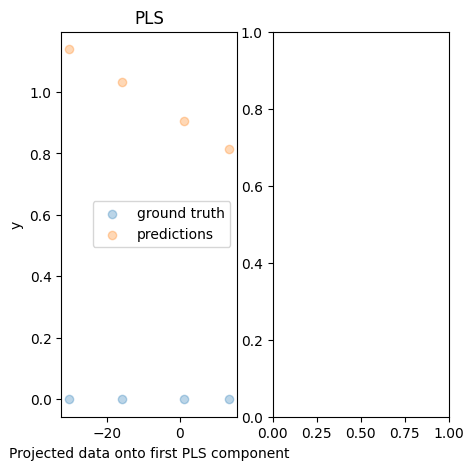

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(5, 5))

pls = PLSRegression(n_components=1)
pls.fit(X_train, Y_train)


axes[0].scatter(pls.transform(X_test)[:,0], Y_test[:,1], alpha=0.3, label="ground truth")
axes[0].scatter(pls.transform(X_test)[:,0], pls.predict(X_test)[:,1], alpha=0.3, label="predictions")
axes[0].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[0].legend()
plt.show()

## Calculate the values of dependent variables with the model